Accuracy: 0.50
Confusion Matrix:
 [[0 1 0]
 [0 0 0]
 [0 0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



c:\Users\Hp\miniconda3\envs\machine_learning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\miniconda3\envs\machine_learning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\miniconda3\envs\machine_learning\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

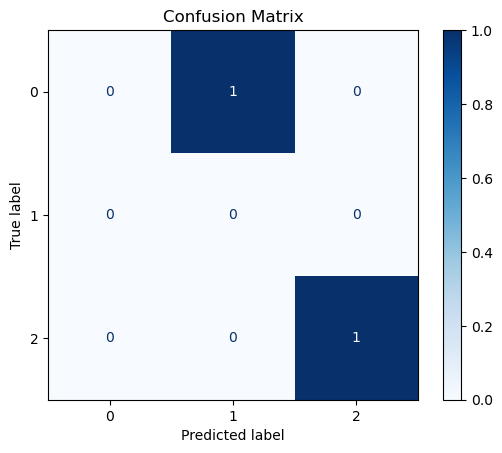

C:\Users\Hp\AppData\Local\Temp\ipykernel_19376\3787788307.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


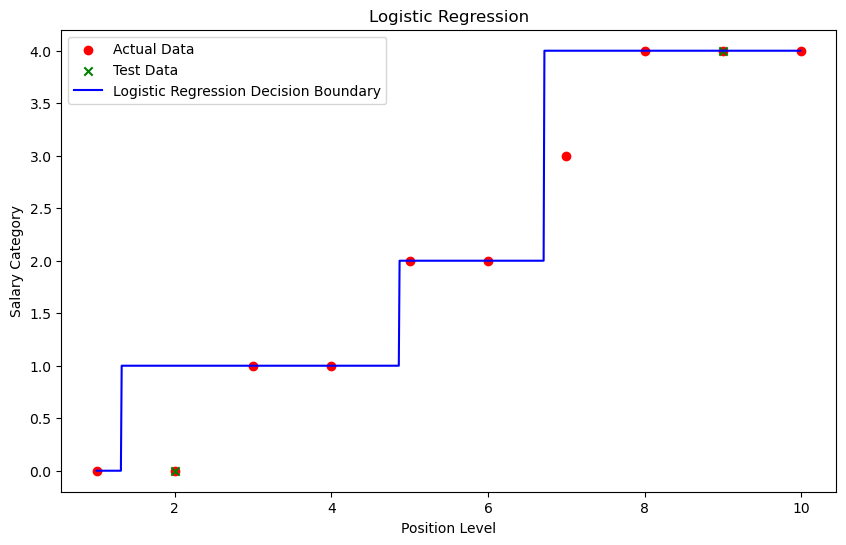

In [15]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

# Importing the dataset
dataset = pd.read_csv(r'D:\Machine learning\dataset\Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Convert the continuous salary data into categorical classes
# Define bins for salary categories
bins = [0, 50000, 100000, 150000, 200000, np.inf]  # Adjust these values based on your data
labels = [0, 1, 2, 3, 4]  # Assign numerical labels to the bins
y_categorical = pd.cut(y, bins=bins, labels=labels)

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Fitting the Logistic Regression model to the training set
classifier = LogisticRegression(solver='newton-cholesky')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Displaying the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Visualizing the results (only for binary or 2-class problems; adjust for multi-class)
# Create a grid of points to visualize the decision boundary
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(-1, 1)
y_grid_pred = classifier.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_categorical, color='red', label='Actual Data')
plt.scatter(X_test, y_test, color='green', label='Test Data', marker='x')  # Plotting test data
plt.plot(X_grid, y_grid_pred, color='blue', label='Logistic Regression Decision Boundary')
plt.title('Logistic Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary Category')
plt.legend()
plt.show()


In [2]:
# Displaying hyperparameters
hyperparameters = classifier.get_params()
print("\nHyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")


Hyperparameters:
C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 200
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False


In [18]:
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000
